In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# load the annotation
annot_dict = np.load('mini_rat7m_train_test_annotation.pkl', allow_pickle=True)

In [8]:
# RUN THIS CELL: DEFINE HELPER FUNCTIONS
# rat7m connectivity information
CONNECTIVITY_DICT = {
    "rat7m": [
        (0, 1), (0, 2), (1, 2), 
        (2, 3), (3, 4), (4, 5), 
        (3, 6), (5, 7),
        (3, 12), (3, 13), 
        (5, 8), (5, 9), 
        (6, 7), 
        (8, 17), (9, 16), 
        (17, 18), (16, 19), 
        (10, 11), (10, 12), (13, 14), (14, 15)]
}

JOINT_NAMES_DICT = {
    'rat7m': {
        0: "HeadF",
        1: "HeadB",
        2: "HeadL",
        3: "SpineF",
        4: "SpineM",
        5: "SpineL",
        6: "Offset1",
        7: "Offset2",
        8: "HipL",
        9: "HipR",
        10: "ElbowL",
        11: "ArmL",
        12: "ShoulderL",
        13: "ShoulderR",
        14: "ElbowR",
        15: "ArmR",
        16: "KneeR",
        17: "KneeL",
        18: "ShinL",
        19: "ShinR"
    }
}

COLOR_DICT = {
    'rat7m': [
        '#8DD3C7', '#8DD3C7', '#8DD3C7',
        '#FFFFB3', '#FFFFB3', '#FFFFB3',
        '#BEBADA', '#BEBADA',
        '#FB8072', '#FB8072',
        '#80B1D3', '#80B1D3',
        '#FDB462',
        '#B3DE69', '#B3DE69',
        '#FCCDE5', '#FCCDE5',
        '#BC80BD', '#BC80BD', '#BC80BD', '#BC80BD'
    ]
}

def connectLimbs(ax, keypoints, connectivity, colors=None, line_width=3):
    """Connect corresponding keypoints based limb anatomy.
    Adapoted from Iskakov repo: 
    mvn/utils/vis.py
    """
    if colors is None:
        colors = ['blue'] * len(keypoints)
    for (index_from, index_to), color in zip(connectivity, colors):
        xs, ys = [np.array([keypoints[index_from, j], keypoints[index_to, j]]) for j in range(2)]
        ax.plot(xs, ys, c=color, lw=line_width)

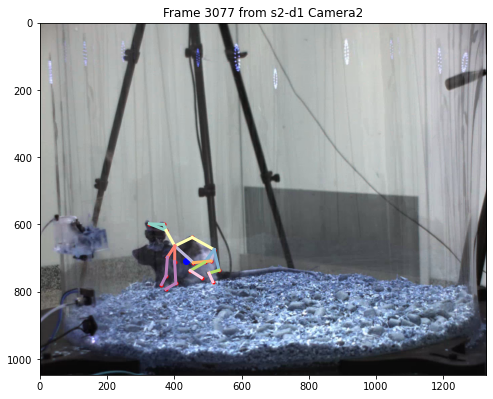

In [52]:
# visualize one random 2D rat pose
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
camname = np.random.choice(annot_dict['camera_names'])
random_idx = np.random.randint(0, len(annot_dict['table']['subject_idx']), 1)[0]

# load image
img = cv2.imread(annot_dict['table']['image_path'][camname][random_idx])
ax.imshow(img)
# load 2d pose
pose_2d = annot_dict['table']['2D_keypoints'][camname][random_idx]
# load center of mass
com = annot_dict['table']['2D_com'][camname][random_idx]

# connect limbs
connectLimbs(ax, pose_2d, CONNECTIVITY_DICT["rat7m"], COLOR_DICT["rat7m"])
for pts in pose_2d:
    ax.scatter(pts[0], pts[1], marker='.', color='r') # mark body joints in red
ax.scatter(com[0], com[1], color='blue') # mark com in blue
plt.title('Frame {} from s{}-d{} {}'.format(annot_dict['table']['frame_idx'][camname][random_idx], 
                                         int(annot_dict['table']['subject_idx'][random_idx]), 
                                         int(annot_dict['table']['day_idx'][random_idx]),
                                         camname))
plt.show()